Pulled smaller files to load into GitHub and clean and filter to demonstrate an understanding of basic Python coding.

In [1]:
import pandas as pd
import numpy as np
#first_calls = pd.read_csv('customer_info.csv')

In [2]:
#first_calls.head()

I have attempted to pull in multiple files with satisfactory data points to make some determination of direction or need, and have failed to find anything small enough. Made a decision to create a uniquie file that should at least give some coding examples.

In [3]:
project = pd.read_csv('final_customer_cases.csv')

/tmp/ipython-input-3611904490.py:1: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  project = pd.read_csv('final_customer_cases.csv')


In [4]:
project.head()

,Unnamed: 0,case_id,date_time,customer_id,channel,reason,age,gender
0,1.0,CC101,1/1/2017 10:32,C2448,phone,signup,76,female
1,2.0,CC102,1/1/2017 11:35,C2449,phone,signup,61,male
2,3.0,CC103,1/1/2017 11:37,C2450,phone,signup,58,female
3,4.0,CC104,1/1/2017 13:28,C2451,phone,signup,62,female
4,5.0,CC105,1/1/2017 13:52,C2452,phone,signup,71,male


In [5]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   330512 non-null  float64
 1   case_id      330512 non-null  object 
 2   date_time    330512 non-null  object 
 3   customer_id  330512 non-null  object 
 4   channel      330512 non-null  object 
 5   reason       330512 non-null  object 
 6   age          508932 non-null  int64  
 7   gender       508932 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 31.1+ MB


1. Remove the Null values from the age and gender columns to review full sets of data
Create a new file to return to with 330512 rows.
2. get a list of how many channels
3. sort for male, female
3. make scatter plot of caseID count and date range -
5. utilize histogram for channel and reason
4. is there a pattern for reasons
5. see if there is a correlation between reason and gender and date

In [6]:
project.dropna(inplace=True)

In [7]:
project.to_csv('clean_customer_cases.csv')

In [8]:
project.describe()

,Unnamed: 0,age
count,330512.000000,330512.000000
mean,165256.500000,58.179742
std,95410.740423,8.798587
min,1.000000,23.000000
25%,82628.750000,53.000000
50%,165256.500000,59.000000
75%,247884.250000,65.000000
max,330512.000000,78.000000


In [9]:
project.value_counts('gender')

,count
gender,
male,195865
female,134647


In [10]:
project.value_counts('gender','')

,count
gender,
male,195865
female,134647


Gender is fairly well distributed. but maybe we can find where the ages blend

In [11]:
project.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,134647.0,58.012031,9.061465,23.0,52.0,59.0,64.0,78.0
male,195865.0,58.295035,8.611349,23.0,53.0,59.0,65.0,78.0


In [12]:
project.value_counts('channel')

,count
channel,
phone,286840
email,43672


In [13]:
project.value_counts('channel','reason')

,proportion
channel,
phone,0.867866
email,0.132134


In [14]:
project.groupby('channel')['reason'].describe()

,count,unique,top,freq
channel,,,,
email,43672,1,support,43672
phone,286840,2,support,157313


In [15]:
project.value_counts('reason')

,count
reason,
support,200985
signup,129527


Lets group the years and months to show if months drive the support volumn.

In [16]:
import matplotlib.pyplot as plt

In [17]:
project.groupby('date_time')['reason'].describe()

,count,unique,top,freq
date_time,,,,
1/1/2017 10:32,1,1,signup,1
1/1/2017 11:35,1,1,signup,1
1/1/2017 11:37,1,1,signup,1
1/1/2017 13:28,1,1,signup,1
1/1/2017 13:52,1,1,signup,1
...,...,...,...,...
9/9/2021 9:52,1,1,signup,1
9/9/2021 9:54,2,2,support,1
9/9/2021 9:57,2,1,signup,2


I will have to create a year / month bin for escalations

In [18]:
#claudeai helped
# Extract year
# Extract month
##
# Or combine into one column (YYYY-MM)
project['year_month'] = pd.to_datetime(project['date_time']).dt.to_period('M')
grouped = project.groupby('year_month').size()
print(grouped)


year_month
2017-01     1371
2017-02     1350
2017-03     1697
2017-04     1626
2017-05     1894
           ...  
2021-09    12831
2021-10    12126
2021-11    10927
2021-12    10020
2022-01        1
Freq: M, Length: 61, dtype: int64


In [22]:
project.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330512 entries, 0 to 330511
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype    
---  ------       --------------   -----    
 0   Unnamed: 0   330512 non-null  float64  
 1   case_id      330512 non-null  object   
 2   date_time    330512 non-null  object   
 3   customer_id  330512 non-null  object   
 4   channel      330512 non-null  object   
 5   reason       330512 non-null  object   
 6   age          330512 non-null  int64    
 7   gender       330512 non-null  object   
 8   year_month   330512 non-null  period[M]
dtypes: float64(1), int64(1), object(6), period[M](1)
memory usage: 25.2+ MB


In [19]:
import seaborn as sns

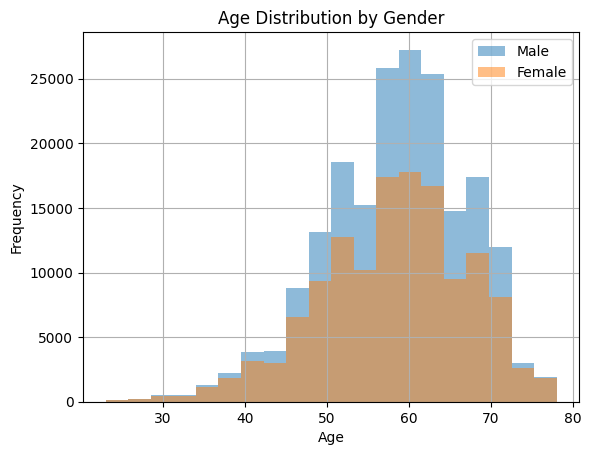

In [21]:
# Age distribution by gender
project[project['gender'] == 'male']['age'].hist(bins=20, alpha=0.5, label='Male')
project[project['gender'] == 'female']['age'].hist(bins=20, alpha=0.5, label='Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.legend()
plt.show()


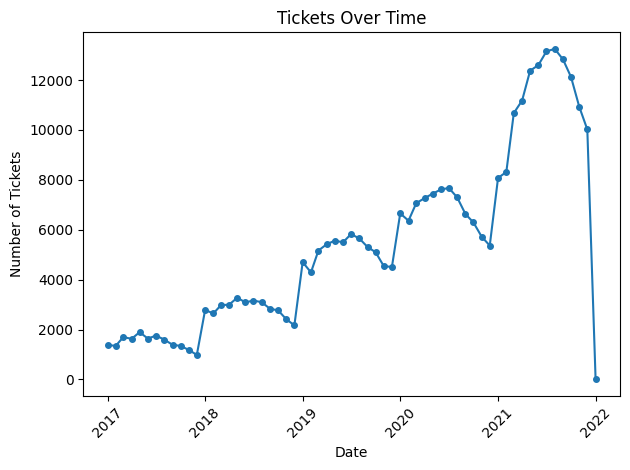

In [24]:
# Count tickets per year_month
ticket_counts = project.groupby('year_month')['case_id'].count().sort_index()

# Convert Period index to timestamps for plotting
x_values = ticket_counts.index.to_timestamp()

plt.plot(x_values, ticket_counts.values, marker='o', linestyle='-', markersize=4)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Tickets Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Are we getting more tickets, because we have more sign-ups from 2020 to 2022.


In [ ]:
# generate how many sign-ups over the date stamps
#group by reason over year_month

In [25]:
project.groupby('year_month')['reason'].describe()

,count,unique,top,freq
year_month,,,,
2017-01,1371,2,signup,1306
2017-02,1350,2,signup,1183
2017-03,1697,2,signup,1367
2017-04,1626,2,signup,1182
2017-05,1894,2,signup,1299
...,...,...,...,...
2021-09,12831,2,support,10316
2021-10,12126,2,support,10102
2021-11,10927,2,support,9160


In [26]:
project.value_counts('reason')

,count
reason,
support,200985
signup,129527


In [27]:
# Filter for support reason only
support_calls = project[project['reason'] == 'support']

# Count calls per customer
customer_support_counts = support_calls['customer_id'].value_counts()

print(f"Total unique customers who called for support: {len(customer_support_counts)}")
print(f"Total support calls: {customer_support_counts.sum()}")
print(f"\nTop 10 customers by support call volume:")
print(customer_support_counts.head(10))

Total unique customers who called for support: 176235
Total support calls: 200985

Top 10 customers by support call volume:
customer_id
C253425    4
C407001    4
C170875    4
C174493    4
C20510     4
C7214      4
C151487    4
C392556    4
C351038    4
C383489    4
Name: count, dtype: int64


In [28]:
# Count calls per customer with gender info
customer_support_counts = support_calls.groupby(['customer_id', 'gender']).size().reset_index(name='call_count')

In [31]:
# Gender breakdown for visualization
gender_breakdown = support_calls.groupby('gender').agg({
    'customer_id': 'nunique',
    'case_id': 'count'
}).rename(columns={'customer_id': 'unique_customers', 'case_id': 'total_calls'})

<Figure size 1000x600 with 0 Axes>

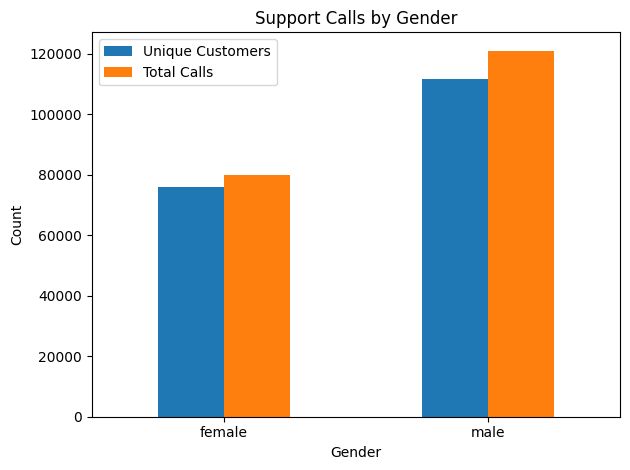

In [32]:
# Visualize gender distribution
plt.figure(figsize=(10, 6))
gender_breakdown.plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Support Calls by Gender')
plt.legend(['Unique Customers', 'Total Calls'])
plt.tight_layout()
plt.show()

Looks like females that use the service, need less support calls.